In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.neural_network
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Usaremos un dataset de digitos escritos a mano, tenemos 12600 imagenes de 28x28
data = pd.read_csv('./train_sample.csv')
Y = data['label']
X = data.drop('label', axis = 1)
#X = data.drop('Unnamed: 0', axis = 1)
del X['Unnamed: 0']
print(np.shape(X), np.shape(Y))

(12600, 784) (12600,)


In [6]:
scaler = StandardScaler()
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size = 0.5)
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

start_10 = 0.1*len(x_train)
data_percentage = np.arange(start_10,len(x_train)+start_10,start_10)

In [14]:
#Primero realizamos el fit con la función de activación spftmax y obtenemos el score para train y test 
#seleccionando el 10%,20%,30%, ... de los datos

In [7]:
mlp = sklearn.neural_network.MLPClassifier(activation='logistic',hidden_layer_sizes=(4,4,4))
f1_train_soft = []
f1_test_soft = []
n = np.arange(0.1,1.1,0.1)
for i in n:
    x_training = x_train[:int(i*len(x_train)),:]
    y_training = y_train[:int(i*len(y_train))]
    x_testing = x_test[:int(i*len(x_test)),:]
    y_testing = y_test[:int(i*len(y_test))]
    mlp.fit(x_training, y_training)
    f1_train_soft.append(sklearn.metrics.f1_score(y_training, mlp.predict(x_training), average='macro'))
    f1_test_soft.append(sklearn.metrics.f1_score(y_testing, mlp.predict(x_testing), average='macro'))

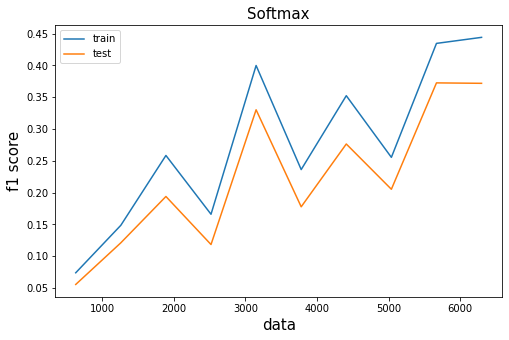

In [9]:
plt.figure(figsize=(8,5))
plt.plot(data_percentage,f1_train_soft,label='train')
plt.plot(data_percentage,f1_test_soft,label='test')
plt.title('Softmax',fontsize=15)
plt.xlabel('data',fontsize=15)
plt.ylabel('f1 score',fontsize=15)
plt.legend()
plt.show()
#Usando la función de activación softmax nos muestra que es core va aumentando a medida que se va aumentando
#la cantidad de datos. Además, tienden a ser similares el score para train y test. 

In [ ]:
#Primero realizamos el fit con la función de activación relu y obtenemos el score para train y test seleccionando 
#el 10%,20%,30%, ... de los datos

In [10]:
mlp = sklearn.neural_network.MLPClassifier(activation='relu',hidden_layer_sizes=(4,4,4))
f1_train_relu = []
f1_test_relu = []
n = np.arange(0.1,1.1,0.1)
for i in n:
    x_training = x_train[:int(i*len(x_train)),:]
    y_training = y_train[:int(i*len(y_train))]
    x_testing = x_test[:int(i*len(x_test)),:]
    y_testing = y_test[:int(i*len(y_test))]
    mlp.fit(x_training, y_training)
    f1_train_relu.append(sklearn.metrics.f1_score(y_training, mlp.predict(x_training), average='macro'))
    f1_test_relu.append(sklearn.metrics.f1_score(y_testing, mlp.predict(x_testing), average='macro'))

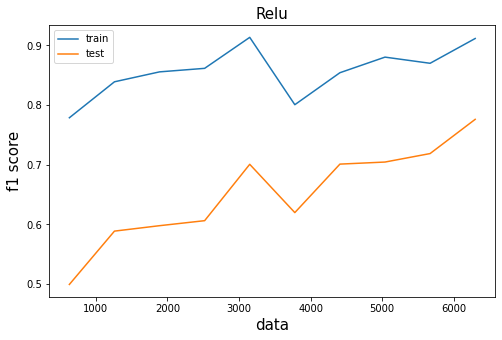

In [11]:
plt.figure(figsize=(8,5))
plt.plot(data_percentage,f1_train_relu,label='train')
plt.plot(data_percentage,f1_test_relu,label='test')
plt.title('Relu',fontsize=15)
plt.xlabel('data',fontsize=15)
plt.ylabel('f1 score',fontsize=15)
plt.legend()
plt.show()
#En este caso, el score aumenta a medida que la cantidad de datos aumenta. Sin embargo, es notable la separación
#entre las dos curvas para train y test.

In [ ]:
#ahora variamos el parámetro alpha y realizamos el fit con todos los datos usando relu

In [12]:
f1_train_alpha = []
f1_test_alpha = []
alpha = np.logspace(-5,0,num=10)
for i in alpha:
    mlp = sklearn.neural_network.MLPClassifier(activation='relu',hidden_layer_sizes=(4,4,4),alpha=i)
    mlp.fit(x_train, y_train)
    f1_train_alpha.append(sklearn.metrics.f1_score(y_train, mlp.predict(x_train), average='macro'))
    f1_test_alpha.append(sklearn.metrics.f1_score(y_test, mlp.predict(x_test), average='macro'))

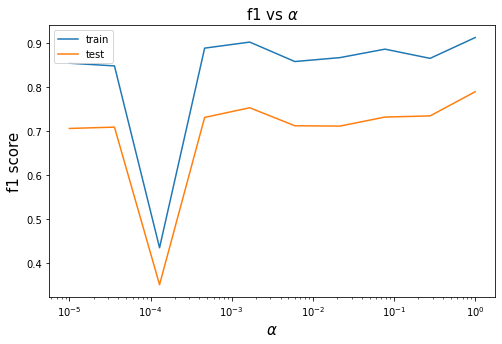

In [13]:
plt.figure(figsize=(8,5))
plt.semilogx(alpha,f1_train_alpha,label='train')
plt.semilogx(alpha,f1_test_alpha,label='test')
plt.title(r'f1 vs $\alpha$',fontsize=15)
plt.xlabel(r'$\alpha$',fontsize=15)
plt.ylabel('f1 score',fontsize=15)
plt.legend()
plt.show()
#El score tiene un comportamiento peculiar para un valor de alpha, sin embargo tomando todos los datos, este tiende
# a ser más estable que los anteriores resultados.